<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_04/04_03_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3.3. Ley de Hooke generalizada para materiales isótropos

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Agosto 4, 2022 | Conversión de código de MAXIMA a Python|

## Despeje de las ecuaciones para $\sigma_x$, $\sigma_y$, $\sigma_z$

In [1]:
from sympy import *
init_printing()

Defino las variables

In [2]:
ex, ey, ez = symbols("varepsilon_x, varepsilon_y, varepsilon_z")
sx, sy, sz = symbols("sigma_x, sigma_y, sigma_z")
E, nu, lamb_da = symbols("E, nu, lambda")

ex, ey, ez, sx, sy, sz, E, nu, lamb_da

Defino las ecuaciones, recuerde, igualando la ecuación a cero.

In [3]:
 eq_ex = ex - (1/E)*(sx - nu*(sy + sz))   # eq 1
 eq_ey = ey - (1/E)*(sy - nu*(sx + sz))   # eq 2
 eq_ez = ez - (1/E)*(sz - nu*(sx + sy))   # eq 3

 eq_ex, eq_ey, eq_ez

Despejo sx, sy y sx de las ecuaciones

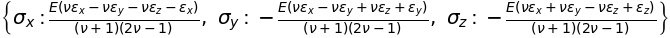

In [4]:
factor( solve([eq_ex, eq_ey, eq_ez], (sx, sy, sz)) )

## Coeficientes de la matriz constitutiva $D$

Se definen las variables faltantes (esfuerzos cortantes y deformacines tangenciales)

In [5]:
txy, txz, tyz  = symbols("tau_xy, tau_xz, tau_yz")
gxy, gxz, gyz  = symbols("gamma_xy, gamma_xz, gamma_yz")

txy, txz, tyz, gxy, gxz, gyz

Se define la delatación cúbica (eq. 4.28)

In [6]:
e = ex + ey + ez
e

Las constantes de Lamé

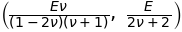

In [7]:
lamb_da = nu*E / ((1+nu) * (1-2*nu))    # eq. 4.15
G = E / (2 * (1+nu))                    # eq 4.8

lamb_da, G

Se definen las ecuaciones de Lamé (eq 4.14), recordadno que deben estar igualadas a cero.

In [8]:
sx = lamb_da*e + 2*G*ex
sy = lamb_da*e + 2*G*ey
sz = lamb_da*e + 2*G*ez

txy = G*gxy
txz = G*gxz
tyz = G*gyz

Se despeja la matriz constitutiva $D$ para el caso isótropo. En MAXIMA se emplea el comando ```coefmatrix```, pero en sympy tenemos ```linear_eq_to_matrix()```.

In [9]:
D = linear_eq_to_matrix([sx, sy, sz, txy, txz, tyz], (ex, ey, ez, gxy, gxz, gyz))[0]
D

⎡       E⋅ν            2⋅E                E⋅ν                          E⋅ν    
⎢───────────────── + ───────       ─────────────────            ──────────────
⎢(1 - 2⋅ν)⋅(ν + 1)   2⋅ν + 2       (1 - 2⋅ν)⋅(ν + 1)            (1 - 2⋅ν)⋅(ν +
⎢                                                                             
⎢            E⋅ν                     E⋅ν            2⋅E                E⋅ν    
⎢     ─────────────────       ───────────────── + ───────       ──────────────
⎢     (1 - 2⋅ν)⋅(ν + 1)       (1 - 2⋅ν)⋅(ν + 1)   2⋅ν + 2       (1 - 2⋅ν)⋅(ν +
⎢                                                                             
⎢            E⋅ν                          E⋅ν                     E⋅ν         
⎢     ─────────────────            ─────────────────       ───────────────── +
⎢     (1 - 2⋅ν)⋅(ν + 1)            (1 - 2⋅ν)⋅(ν + 1)       (1 - 2⋅ν)⋅(ν + 1)  
⎢                                                                             
⎢                                                   

Podemos factorizar 

$$\frac{E}{1+\nu},$$ obteniendo:

In [10]:
simplify(D / (E/(1+nu)))

⎡ ν - 1     -ν       -ν                  ⎤
⎢───────  ───────  ───────   0    0    0 ⎥
⎢2⋅ν - 1  2⋅ν - 1  2⋅ν - 1               ⎥
⎢                                        ⎥
⎢  -ν      ν - 1     -ν                  ⎥
⎢───────  ───────  ───────   0    0    0 ⎥
⎢2⋅ν - 1  2⋅ν - 1  2⋅ν - 1               ⎥
⎢                                        ⎥
⎢  -ν       -ν      ν - 1                ⎥
⎢───────  ───────  ───────   0    0    0 ⎥
⎢2⋅ν - 1  2⋅ν - 1  2⋅ν - 1               ⎥
⎢                                        ⎥
⎢   0        0        0     1/2   0    0 ⎥
⎢                                        ⎥
⎢   0        0        0      0   1/2   0 ⎥
⎢                                        ⎥
⎣   0        0        0      0    0   1/2⎦

NOTA: Podrá pensar que el resultado es el negativo de lo que debería ser, pero no lo es, simplemente debe factorizar (-1) de los términos fraccionarios asociados a los esfuerzos normales.